In [7]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

# API keys
import api_keys

# Initialize Sentiment Analyzer 
# from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [10]:
# Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])

            

In [12]:
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])
tweet_df

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,President Trump weighed all options to stop Ir...,Tue Nov 17 01:11:36 +0000 2020,-0.0644,0.071,0.844,0.084
1,Fox News,Pete Rose admits to Jim Gray that he still bet...,Tue Nov 17 00:53:09 +0000 2020,0.2960,0.155,0.845,0.000
2,Fox News,Antifa-aligned group cheers alleged arson at p...,Tue Nov 17 00:45:35 +0000 2020,0.4767,0.205,0.795,0.000
3,Fox News,How do the Moderna and Pfizer coronavirus vacc...,Tue Nov 17 00:32:43 +0000 2020,0.0000,0.000,1.000,0.000
4,Fox News,"Georgia recount unearths more than 2,600 uncou...",Tue Nov 17 00:22:21 +0000 2020,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
495,The New York Times,"Before Justice Ruth Bader Ginsburg's death, th...",Mon Nov 16 14:00:08 +0000 2020,0.0258,0.313,0.415,0.272
496,The New York Times,RT @nytDeniseGrady: Good news from Moderna: it...,Mon Nov 16 13:45:04 +0000 2020,0.7184,0.240,0.760,0.000
497,The New York Times,"In the new season of “The Crown,” Prime Minist...",Mon Nov 16 13:30:05 +0000 2020,0.0000,0.000,1.000,0.000
498,The New York Times,RT @nytopinion: California prides itself on it...,Mon Nov 16 13:15:12 +0000 2020,-0.5499,0.000,0.849,0.151


In [14]:
# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,President Trump weighed all options to stop Ir...,Tue Nov 17 01:11:36 +0000 2020,-0.0644,0.071,0.844,0.084
1,Fox News,Pete Rose admits to Jim Gray that he still bet...,Tue Nov 17 00:53:09 +0000 2020,0.2960,0.155,0.845,0.000
2,Fox News,Antifa-aligned group cheers alleged arson at p...,Tue Nov 17 00:45:35 +0000 2020,0.4767,0.205,0.795,0.000
3,Fox News,How do the Moderna and Pfizer coronavirus vacc...,Tue Nov 17 00:32:43 +0000 2020,0.0000,0.000,1.000,0.000
4,Fox News,"Georgia recount unearths more than 2,600 uncou...",Tue Nov 17 00:22:21 +0000 2020,0.0000,0.000,1.000,0.000


In [15]:
# Count the total number of tweets
tweet_df.count()

tweet_source         500
tweet_text           500
tweet_date           500
tweet_vader_score    500
tweet_pos_score      500
tweet_neu_score      500
tweet_neg_score      500
dtype: int64

In [16]:
# Obtain the source names for reference
tweet_df["tweet_source"].unique()

array(['Fox News', 'CNN', 'BBC News (World)', 'CBS News',
       'The New York Times'], dtype=object)

In [17]:
# Convert dates (currently strings) into datetimes
tweet_df["tweet_date"] = pd.to_datetime(tweet_df["tweet_date"])

# Sort the dataframe by date
tweet_df.sort_values("tweet_date", inplace=True)
tweet_df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
tweet_df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,Republicans hope to put Chuck Schumer in spotl...,2020-11-12 16:33:26+00:00,0.0772,0.141,0.732,0.127
1,Fox News,LA 'defund' police budget cuts force departmen...,2020-11-12 16:59:08+00:00,-0.7184,0.000,0.700,0.300
2,Fox News,Graham to counter 'tsunami of liberal money' b...,2020-11-12 17:12:58+00:00,0.4019,0.153,0.847,0.000
3,Fox News,Children's doctor suspected in 'racially motiv...,2020-11-12 18:02:56+00:00,-0.6249,0.149,0.448,0.403
4,Fox News,Senior State official: Expect a steady stream ...,2020-11-12 18:15:19+00:00,0.0000,0.000,1.000,0.000


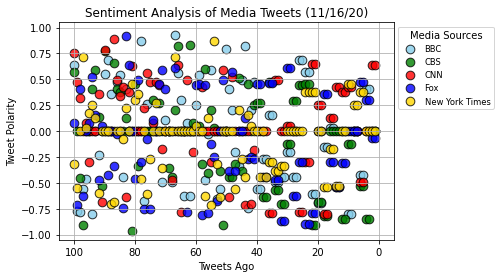

In [19]:
# Build scatter plot for tracking tweet polarity by tweet history
# Note how a few data munging tricks were used to obtain (-100 -> 0 tick marks)
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

In [23]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
tweet_df_polarity = pd.DataFrame(tweet_df_polarity)
tweet_df_polarity

,tweet_vader_score
tweet_source,
BBC News (World),-0.059814
CBS News,-0.081994
CNN,0.055970
Fox News,-0.085191
The New York Times,-0.047866


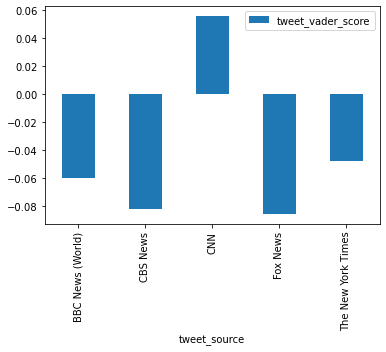

In [41]:
tweet_df_polarity.plot.bar()


plt.show()

In [43]:
plt.savefig("Vader_score")

<Figure size 432x288 with 0 Axes>